In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.convolution import convolve, Box1DKernel
from astropy.visualization import simple_norm
from photutils.aperture import aperture_photometry
from photutils.aperture import ApertureStats
import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from photutils.aperture import CircularAnnulus, CircularAperture
from astropy.stats import SigmaClip
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
wfc3 = glob.glob('results/*wfc3*')
wfc3

['results/epoch1_wfc3_photometry.ecsv',
 'results/epoch3_wfc3_photometry.ecsv',
 'results/epoch2_wfc3_photometry.ecsv']

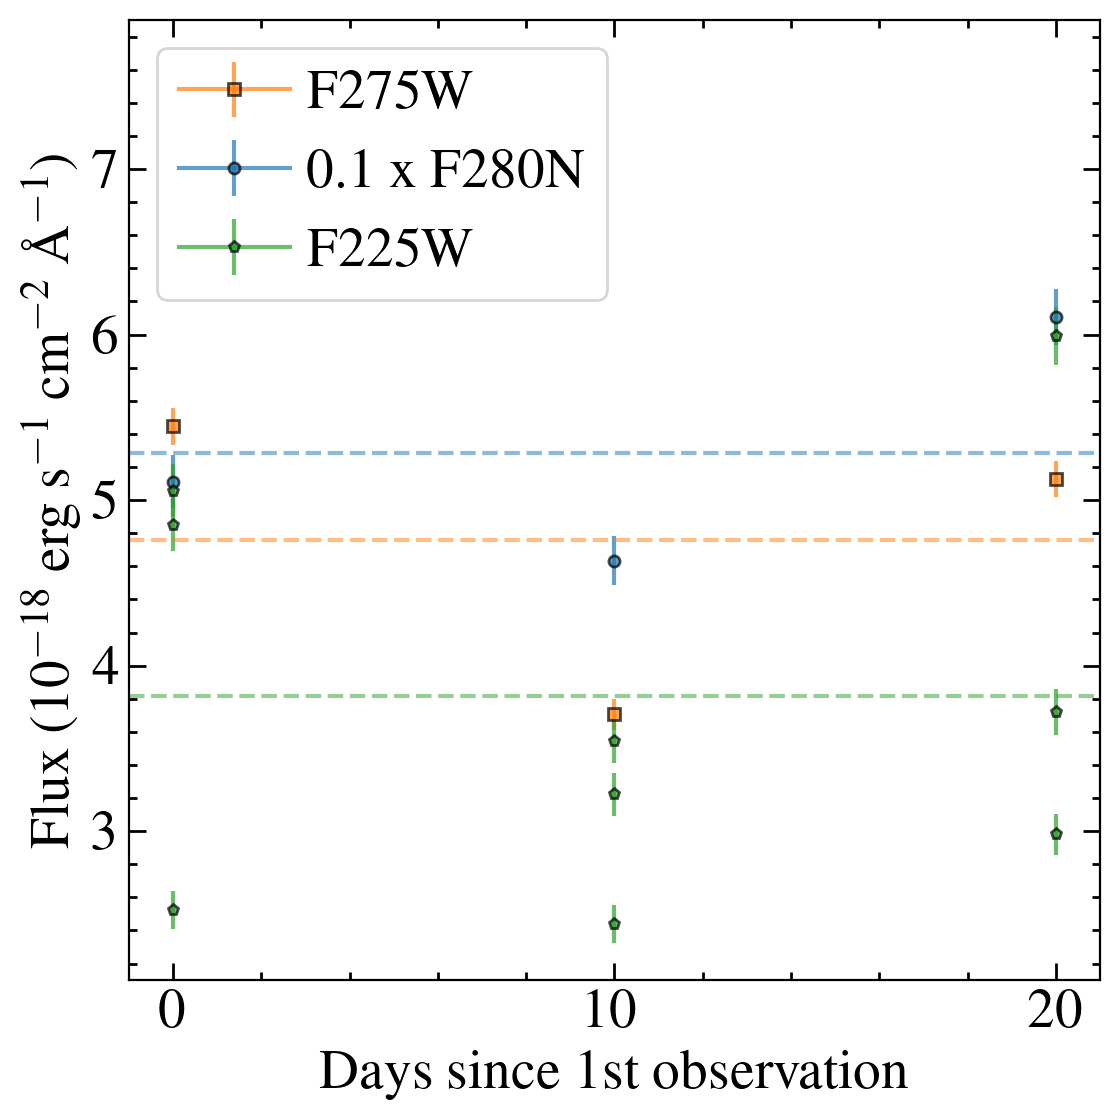

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))
scale = 1e18

#2023-06-20, 2023-06-30, 2023-07-10 
days = [0, 10, 20]

f280n = []
f275w = []
f225w= []

# cols = [0, 1, 2]

for i, phot in enumerate(wfc3):
    data = Table.read(phot)
    for row in data:
        if row['FILTER'] == 'F280N':
            c = 'C0'
            m = 'o'
            f280n.append(row['FLUX'])
        elif row['FILTER'] == 'F275W':
            c = 'C1'
            m ='s'
            f275w.append(row['FLUX'])
        elif row['FILTER'] == 'F225W':
            c = 'C2'
            m ='p'
            f225w.append(row['FLUX'])
            
        if row['FILTER'] == 'F280N':
            ax.errorbar(days[i], row['FLUX']*scale/10, yerr=row['ERROR']*scale/10, label = '0.1 x {}'.format(row['FILTER']), 
                        marker=m, c=c, markeredgecolor='k', markersize=4, alpha=0.7)
        else:
            ax.errorbar(days[i], row['FLUX']*scale, yerr=row['ERROR']*scale, label = row['FILTER'], marker=m, c=c, markeredgecolor='k', markersize=4, alpha=0.7)

ax.axhline(np.mean(f280n)*scale/10, ls ='--', alpha=0.5, c='C0')
ax.axhline(np.mean(f275w)*scale, ls ='--', alpha=0.5, c='C1')
ax.axhline(np.mean(f225w)*scale, ls ='--', alpha=0.5, c='C2')
        
# ax.set_yscale('log')
ax.set_ylabel('Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Days since 1st observation')
ax.set_xticks(days)

# ax.set_xlim(-4, 49)
ax.set_ylim(2.1, 7.9)

    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=2) 

fig.tight_layout()
fig.savefig('plots/wfc3_all_visits.pdf')